In [1]:
import pandas as pd
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

u'0.18.1'

In [25]:
%matplotlib inline

In [26]:
data=pd.read_csv("plato.csv", header=None)
data.head()

,0,1
0,0,0.99913
1,1,1.00301
2,2,1.00693
3,3,1.01087
4,4,1.01484


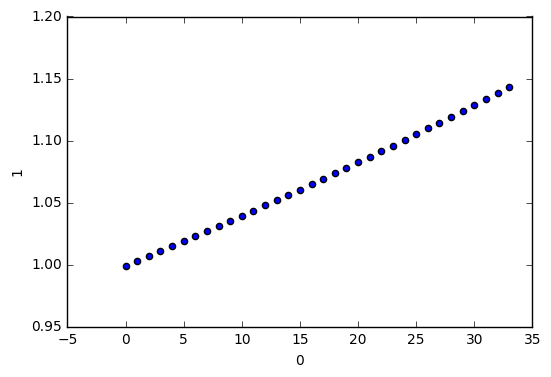

In [27]:
df = pd.DataFrame(data)
df.plot.scatter(x=0, y=1)

In [28]:
def graph(xdata, xlim, ydata, ylim, qout):
    xp = np.linspace(*xlim, num=1500)
    fn = np.poly1d(qout)
    print(fn)
    pxp = fn(xp)

    plt.plot(xdata, ydata, '.', xp, pxp, '-')
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xlabel('x')
    plt.ylabel('y', rotation='horizontal')
    plt.grid(True)
    plt.show()

In [29]:
xdata = df[0]
ydata = df[1]

qout = np.polyfit(xdata, ydata, 3)
print(np.poly1d(qout))

           3             2
4.267e-08 x + 1.351e-05 x + 0.003873 x + 0.9991


           3             2
4.267e-08 x + 1.351e-05 x + 0.003873 x + 0.9991


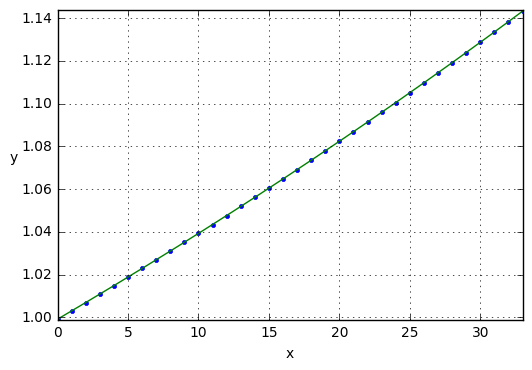

In [30]:
graph(xdata, [0, 33], ydata, [0.999, 1.144], qout)

In [31]:
orig = [4.3074 * 10**-8, 1.3488 * 10**-5, 0.0038661, 1.00001]
print(np.poly1d(orig))

           3             2
4.307e-08 x + 1.349e-05 x + 0.003866 x + 1


           3             2
4.307e-08 x + 1.349e-05 x + 0.003866 x + 1


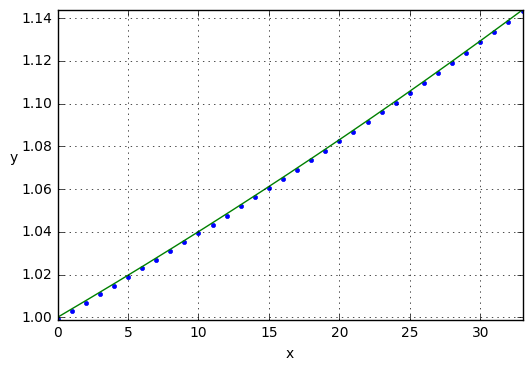

In [32]:
graph(xdata, [0, 33], ydata, [0.999, 1.144], orig)

In [33]:
print("Polynomial Fit Coefficients (with Significant Digits)")
print("Calculated vs Original")
print("C4 = {: 0.4e} vs {: 0.4e}".format(qout[0], orig[0]))
print("C3 = {: 0.4e} vs {: 0.4e}".format(qout[1], orig[1]))
print("C2 = {: 0.4f}     vs {: 0.4f}".format(qout[2], orig[2]))
print("C1 = {: 0.4f}     vs {: 0.4f}".format(qout[3], orig[3]))

Polynomial Fit Coefficients (with Significant Digits)
Calculated vs Original
C4 =  4.2671e-08 vs  4.3074e-08
C3 =  1.3510e-05 vs  1.3488e-05
C2 =  0.0039     vs  0.0039
C1 =  0.9991     vs  1.0000


In [34]:
# Reverse
xdata = df[1]
ydata = df[0]

qout = np.polyfit(xdata, ydata, 3)
print(np.poly1d(qout))

       3         2
190.8 x - 800.8 x + 1287 x - 676.6


       3         2
190.8 x - 800.8 x + 1287 x - 676.6


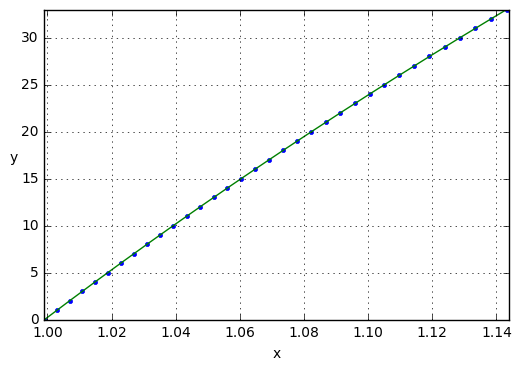

In [36]:
graph(xdata, [0.999, 1.144], ydata, [0, 33], qout)

In [37]:
orig = [182.94, -776.43, 1262.45, -668.962]
print(np.poly1d(orig))

       3         2
182.9 x - 776.4 x + 1262 x - 669


       3         2
182.9 x - 776.4 x + 1262 x - 669


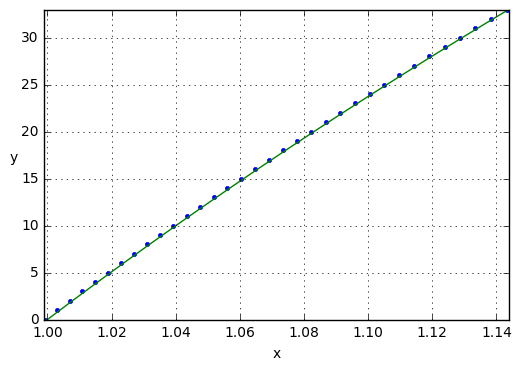

In [38]:
graph(xdata, [0.999, 1.144], ydata, [0, 33], orig)

In [47]:
print("Polynomial Fit Coefficients (with Significant Digits)")
print("Calculated       vs Original")
print("C4 = {: 0.4e} vs {: 0.4e}".format(qout[0], orig[0]))
print("C3 = {: 0.4e} vs {: 0.4e}".format(qout[1], orig[1]))
print("C2 = {: 0.4f}  vs {: 0.4f}".format(qout[2], orig[2]))
print("C1 = {: 0.4f}   vs {: 0.4f}".format(qout[3], orig[3]))

Polynomial Fit Coefficients (with Significant Digits)
Calculated       vs Original
C4 =  1.9084e+02 vs  1.8294e+02
C3 = -8.0079e+02 vs -7.7643e+02
C2 =  1286.7419  vs  1262.4500
C1 = -676.5613   vs -668.9620


# Thoughts

The original coefficients from Zymergy seem to be slightly (but not largely) off of the polynomial fits here.  I would argue that the new fits are better given the same data.